#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline       
#to display  the plots in jupyter notebook
import seaborn as sns  #for interactive visulization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  #
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # to use the classifier
from sklearn.metrics import classification_report   #to generate classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings   #to disable runtime warninigs

warnings.filterwarnings('ignore')


DATA LOADING

In [2]:
Data = pd.read_csv('creditcard_2023.csv')

In [3]:
print('The shape of the data is: ', Data.shape)
Data.head(10)

The shape of the data is:  (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


V1-V28 are made unknown to the public due to sececurity reasons of the company

Now let's desscribed the entire data set 

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

There are no missing values in each column 

In [5]:
Data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Observation
1. The dataset contains 568630 Rows and 8 Columns
2. There are no misising values here
3. The data types are quite corresponding to the data entries
4. 'Class' is the target Variable indicating is the transaction is fraudulent (1) or not (0)

# Preprocessing Stage

In [6]:
Data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#Lets check for data duplicaton
Data.duplicated().any()

False

Observation
1. No missing data
3. No duplicated data
4. dtypes also looks fine

# Exploratory Data Analysis   (EDA)

In [8]:
#Firstly lets use the heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

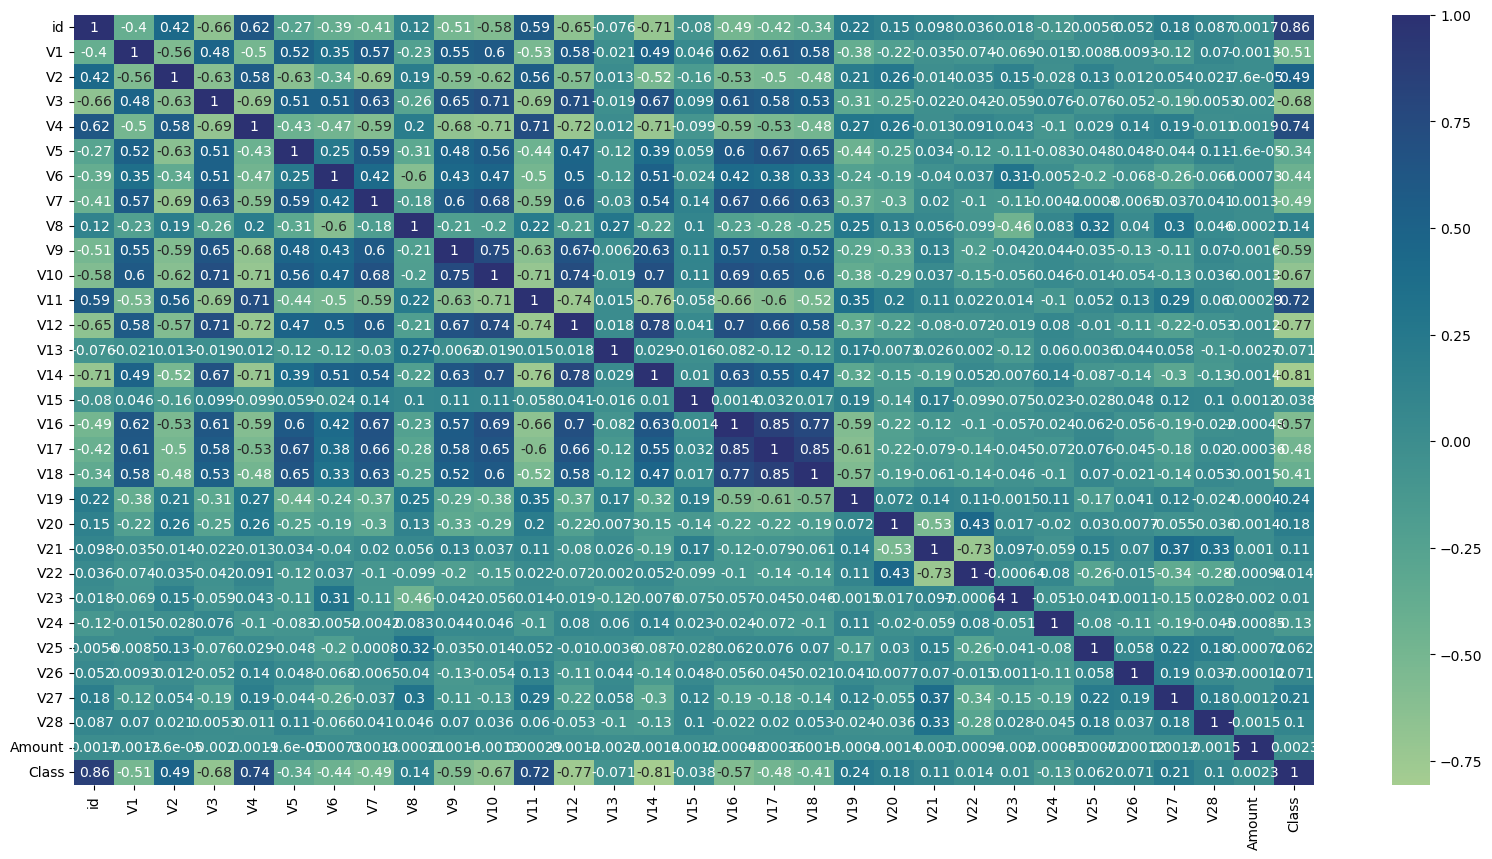

In [9]:
Plain_figure = plt.figure(figsize=[20,10])
sns.heatmap(Data.corr(), cmap= 'crest', annot= True)
plt.show

Observation
1. V17 and V18 are highly correlated
2. V17 and V16 are highly correlated
3. V9 and V10 are co-corelated
4. V14 has a negative corelation with V4.
5. V12 is also negatively co-related with V10 and V11.
6. V11 is ngetively co-related with V10 and positvely with V4.
7. V3 is positevely co-related with V10 and V12.


In [10]:
#Lets move on to use pair plot

In [11]:
#sns.pairplot(data= Data, hue='Class')

To check the skewness of the feature

In [12]:
Data.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

1.Note: Skewness information are used in feature engineering; 
    I might consider creating a new feature that captures the 
    logarithmic or square root transformation of that feature to reduce skewness

Obsservation
1. Features like V1,V10,V23 are highly negatively skewed.
2. 

In [13]:
#To check the distribution of some features

<AxesSubplot:>

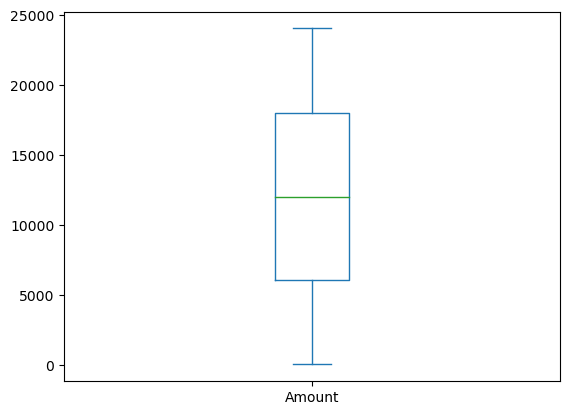

In [14]:
Data['Amount'].plot.box()

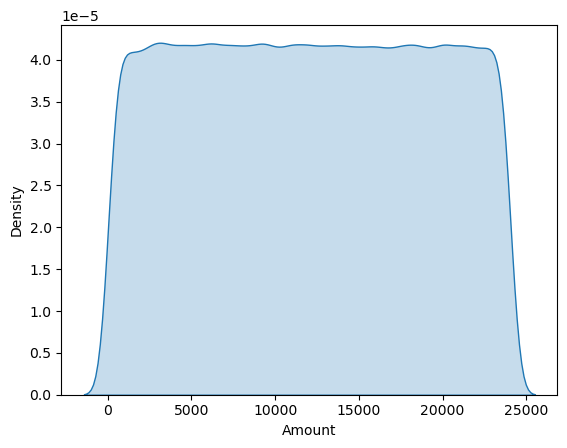

In [15]:
sns.kdeplot(data = Data['Amount'], shade = True)
plt.show()

Observation
The Amount is fairly Normally Distriuted

In [16]:
#Lets look at features V1, V10, V23 and V12 because of their skewness is worth studying among all other features

Text(0.5, 0.98, 'Distribution of V1,V10,V12,V23')

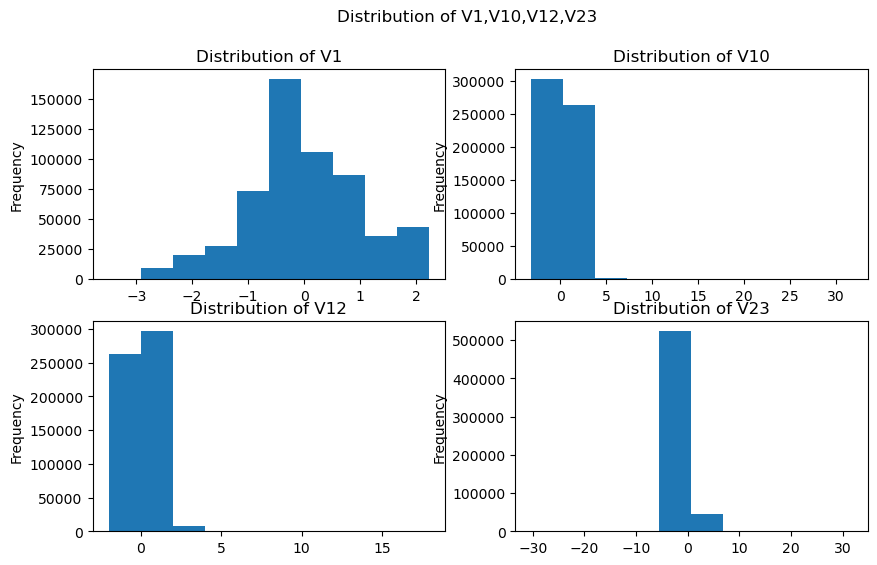

In [17]:
paper, axes = plt.subplots(2,2,  figsize = (10,6))
Data['V1'].plot(kind='hist', ax=axes[0,0], title='Distribution of V1')
Data['V10'].plot(kind ='hist', ax= axes[0,1], title='Distribution of V10')
Data['V12'].plot(kind='hist', ax=axes[1,0], title='Distribution of V12')
Data['V23'].plot(kind='hist', ax=axes[1,1], title='Distribution of V23')
plt.suptitle('Distribution of V1,V10,V12,V23')

In [18]:
#Lets check the output feature CLASS

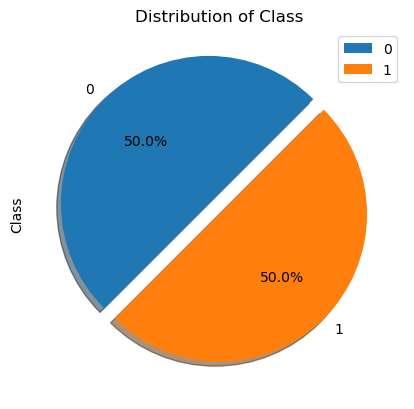

In [19]:
Data['Class'].value_counts().plot.pie(explode= [0.1, 0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class')
plt.show()

Observation
1. The output is equally balanced

# Data Preparation

In [20]:
#Preparing the data for the model

In [21]:
Data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [22]:
#To divide the columns into independent and depndent 

In [23]:
x = Data.drop(['id','Class'], axis=1)
y = Data['Class']

In [24]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [25]:
print('Shape of x is', x.shape)
print('Shape of y is ', y.shape)

Shape of x is (568630, 29)
Shape of y is  (568630,)


In [26]:
#Lets standardize all our features to prevent features with lager scale to domnate those with smaller scale

In [27]:
sc = StandardScaler()

In [28]:
x_scaled = sc.fit_transform(x)

In [29]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [30]:
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


# Modelling

In [31]:
#Lets split our dataset into train and test

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size
                                                   = 0.25, random_state= 15, stratify = y)

In [33]:
#Lets see the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


#logistic Regression 

In [34]:
lr  = LogisticRegression()
lr.fit(x_train,  y_train)

LogisticRegression()

In [35]:
#Lets define a function for Checking MOdel Accuracy, Classification Report 
#and and Confusion Matrix 

In [36]:
def model_eval(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    conf_matrix = confusion_matrix(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('Model Accuracy is: ', round(acc_score, 2))
    print (conf_matrix)
    print(class_rep)

In [37]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [38]:
#Lets see the Evaluation Matrix of train and test dataset

In [39]:
print('---------------Training  Accuracy-------------')
model_eval(y_train, preds_lr_train)

---------------Training  Accuracy-------------
Model Accuracy is:  0.97
[[208643   4593]
 [ 10330 202906]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    213236
           1       0.98      0.95      0.96    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [40]:
print('---------------Training  Accuracy-------------')
model_eval(y_test, preds_lr_test)

---------------Training  Accuracy-------------
Model Accuracy is:  0.96
[[69545  1534]
 [ 3520 67559]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



Observations
1. Logistic Regression Model is giving 96% accuracy.
2. Lets see tree-based models

Decision Tree

In [41]:
#Lets build Decision tree Mode and fit

In [42]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [59]:
importance_Score = dtree.feature_importances_
imp_score_dt = pd.DataFrame(importance_Score, columns=['Imp_score'])
print(imp_score_dt)

    Imp_score
0    0.013963
1    0.005483
2    0.010808
3    0.061489
4    0.004855
5    0.003657
6    0.005233
7    0.012905
8    0.002414
9    0.006791
10   0.012244
11   0.017583
12   0.006317
13   0.778393
14   0.005200
15   0.006045
16   0.004258
17   0.002527
18   0.007022
19   0.002155
20   0.004747
21   0.002871
22   0.003159
23   0.003532
24   0.002696
25   0.006176
26   0.001976
27   0.005440
28   0.000059


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (31,) and arg 1 with shape (29,).

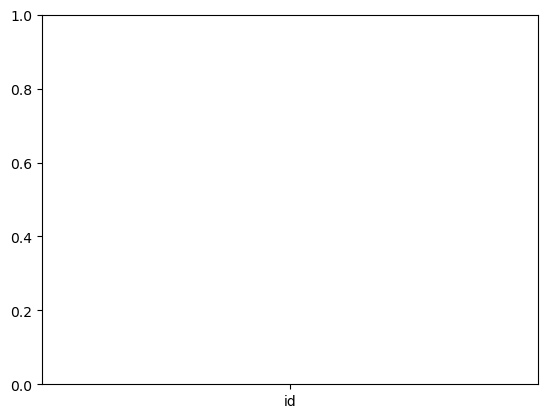

In [62]:
feature_name = [Data.columns]
plt.bar(Data.columns,importance_Score)

In [44]:
print('-----------Train Accuracy-------------')
model_eval(y_train, preds_dtree_train)

-----------Train Accuracy-------------
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [45]:
print('-----------Test Accuracy-------------')
model_eval(y_test, preds_dtree_test)

-----------Test Accuracy-------------
Model Accuracy is:  1.0
[[70853   226]
 [   95 70984]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Observation 
1. The model is giving 100% accuracy

XGBOOSt Classifier

In [48]:
pip install xgboost


     -------------------------------------- 99.7/99.7 MB 106.9 kB/s eta 0:00:00


In [49]:
import xgboost as xgb
xgbcls= xgb.XGBRFClassifier()
xgbcls.fit(x_train,y_train )

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [64]:
pred_y_test= xgbcls.predict(x_test)

In [66]:
print('--------------Test Accuracy-----------------')
model_eval(y_test, pred_y_test)

--------------Test Accuracy-----------------
Model Accuracy is:  0.97
[[69837  1242]
 [ 3280 67799]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.95      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



# Hyperparameter Tuning


In [67]:
#We use this stage to determine the best parameter a model can

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
param_dist_xgb = {'n_estimator': [50,100,150,200,300,400] , 'learning_rate': [0.01, 0.1, 0.2, 0.3],'max_depth': [3, 4, 5, 6]}

In [72]:
xgb_cls = RandomizedSearchCV(xgbcls, param_dist_xgb, verbose = 2)

In [78]:
xgb_cls.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....learning_rate=0.3, max_depth=4, n_estimator=200; total time=  33.1s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimator=200; total time=   8.9s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimator=200; total time=   8.7s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimator=200; total time=   8.6s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimator=200; total time=   8.8s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimator=100; total time=   9.8s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimator=100; total time=   9.5s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimator=100; total time=   9.1s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimator=100; total time=   9.3s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimator=100; total time=   9.1s
[CV] END ...learning_rate=0.01, max_depth=6, n_estimator=150; total time=  11.3s
[CV] END ...learning_rate=0.01, max_depth=6, n_e

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             

In [79]:
print('The best parameters are : ', xgb_cls.best_params_)

The best parameters are :  {'n_estimator': 150, 'max_depth': 6, 'learning_rate': 0.01}


In [80]:
pred_xgb_cls_test = xgb_cls.predict(x_test)

In [82]:
model_eval(y_test, pred_xgb_cls_test)

Model Accuracy is:  0.97
[[69837  1242]
 [ 3280 67799]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.95      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



Conclusion
 1. We have performed Exploratory analysis of each feature
 2. We prepared our data and built different ML models
 3. We have seen how each of our models are performing by using Accuracy ,F1 score, Precision and Recall
 4. Random Forest Classifier gave 100% percent accuracy for both the train and the test data set
 5. We have tried using Boosting technique XGBoost and we have a model with 97% accuracy with improvement in False Poitive   and False Negative.
 6. We have further tried doing hyper parameter tuning for XGBoost.We can with different parameters and see if further we can reduce the FP and FN.